<a href="https://colab.research.google.com/github/kartikeya-negi/Data-Analysis-with-Python/blob/main/Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Most streamed songs of all time

Songs have now become an important part of our life.It helps in clearing our minds and focus on our work.In this analysis, I will explore the most played songs dataset through visualizations and graphs using matplotlib and seaborn.

## Downloading the Dataset

The following dataset is downloaded from kaggle.The dataset link is https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kartikeyanegi1323
Your Kaggle Key: ········


100%|██████████| 65.5k/65.5k [00:00<00:00, 33.1MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './spotify-top-2000s-mega-dataset'

In [ ]:
import os
os.listdir(data_dir)

['Spotify-2000.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "zerotopandas-course-project-songs" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kartik13negi/zerotopandas-course-project-songs" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kartik13negi/zerotopandas-course-project-songs


'https://jovian.com/kartik13negi/zerotopandas-course-project-songs'

## Installing and Importing Packages
We will install and import the packages required for this project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation and Cleaning

We will load the dataset and perform necessary operations like handling missing or incorrect data




In [ ]:
import pandas as pd

In [ ]:
songs_df = pd.read_csv('./spotify-top-2000s-mega-dataset/Spotify-2000.csv')
del songs_df["Index"]

In [ ]:
songs_df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


### Exploring the Data
Exploring the number of rows & columns, ranges of values etc.

In [ ]:
songs_df.shape

(1994, 14)

In [ ]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


Here, we noticed that Length of the songs are in object data type so we need to convert the Length of the songs into int data type

In [ ]:
songs_df['Length (Duration)'] = songs_df['Length (Duration)'].str.split(',').str.join('').astype(int)

Now, Let's check the Data Type of Length (Duration)

In [ ]:
songs_df["Length (Duration)"].dtype

dtype('int64')

In [ ]:
songs_df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


### Parsing Dataset

In [ ]:
songs_1900s_df = songs_df[songs_df.Year < 2000].copy()

In [ ]:
songs_1900s_df.sample(10)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
848,Ain't No Sunshine,Bill Withers,classic soul,1971,80,42,48,-11,12,51,125,46,12,76
1251,Uptown Girl,Billy Joel,album rock,1983,129,94,70,-3,60,79,198,7,5,77
1586,Drive,R.E.M.,alternative rock,1992,143,43,47,-12,23,24,271,18,3,62
1757,Whiskey In The Jar,Metallica,alternative metal,1998,133,97,51,-4,19,53,305,0,4,61
1470,Have I Told You Lately,Van Morrison,classic rock,1989,144,48,34,-10,14,18,260,28,3,68
1228,Human Nature,Michael Jackson,pop,1982,93,51,62,-10,26,69,246,54,3,65
1164,Think,The Blues Brothers,blues,1980,129,84,65,-6,24,71,195,50,19,56
924,Band On The Run - Remastered 2010,Paul McCartney,album rock,1973,125,60,48,-9,11,67,313,8,3,71
1901,Lucy In The Sky With Diamonds - Remastered 2009,The Beatles,british invasion,1967,65,33,31,-9,14,67,208,5,3,69
930,Midnight Train to Georgia,Gladys Knight & The Pips,brill building pop,1973,92,38,59,-12,10,45,279,27,5,67


In [ ]:
songs_2000s_df = songs_df[songs_df.Year >= 2000].copy()

In [ ]:
songs_2000s_df.sample(10)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
328,Lost!,Coldplay,permanent wave,2008,87,78,36,-8,38,58,236,1,4,53
513,Later Als Ik Groter Ben,BLØF,dutch pop,2012,130,73,53,-5,8,57,205,0,3,48
164,Uprising,Muse,modern rock,2009,128,91,60,-4,12,41,305,0,8,76
160,One Word,Anouk,dutch indie,2004,92,57,62,-8,11,34,243,10,3,52
98,Binnen,Marco Borsato,dutch cabaret,2002,92,90,50,-7,15,67,275,1,6,30
481,Holiday In Spain,Counting Crows,alternative rock,2012,126,32,65,-11,13,28,233,66,3,56
698,Iederene Hef Een Reden,Bökkers,dutch rock,2017,108,61,57,-9,10,69,185,56,4,41
681,Zoutelande - feat. Geike,BLØF,dutch pop,2017,129,64,67,-7,14,89,223,22,3,41
201,Silence (feat. Sarah McLachlan) - DJ Tiësto's ...,Delerium,trance,2004,138,85,60,-6,6,9,235,1,6,58
22,Als De Morgen Is Gekomen,Jan Smit,dutch pop,2006,96,89,63,-6,9,81,176,5,3,55


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kartik13negi/zerotopandas-course-project-songs" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kartik13negi/zerotopandas-course-project-songs


'https://jovian.com/kartik13negi/zerotopandas-course-project-songs'

## Exploratory Analysis and Visualization





Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's see how many songs are released in particular year.

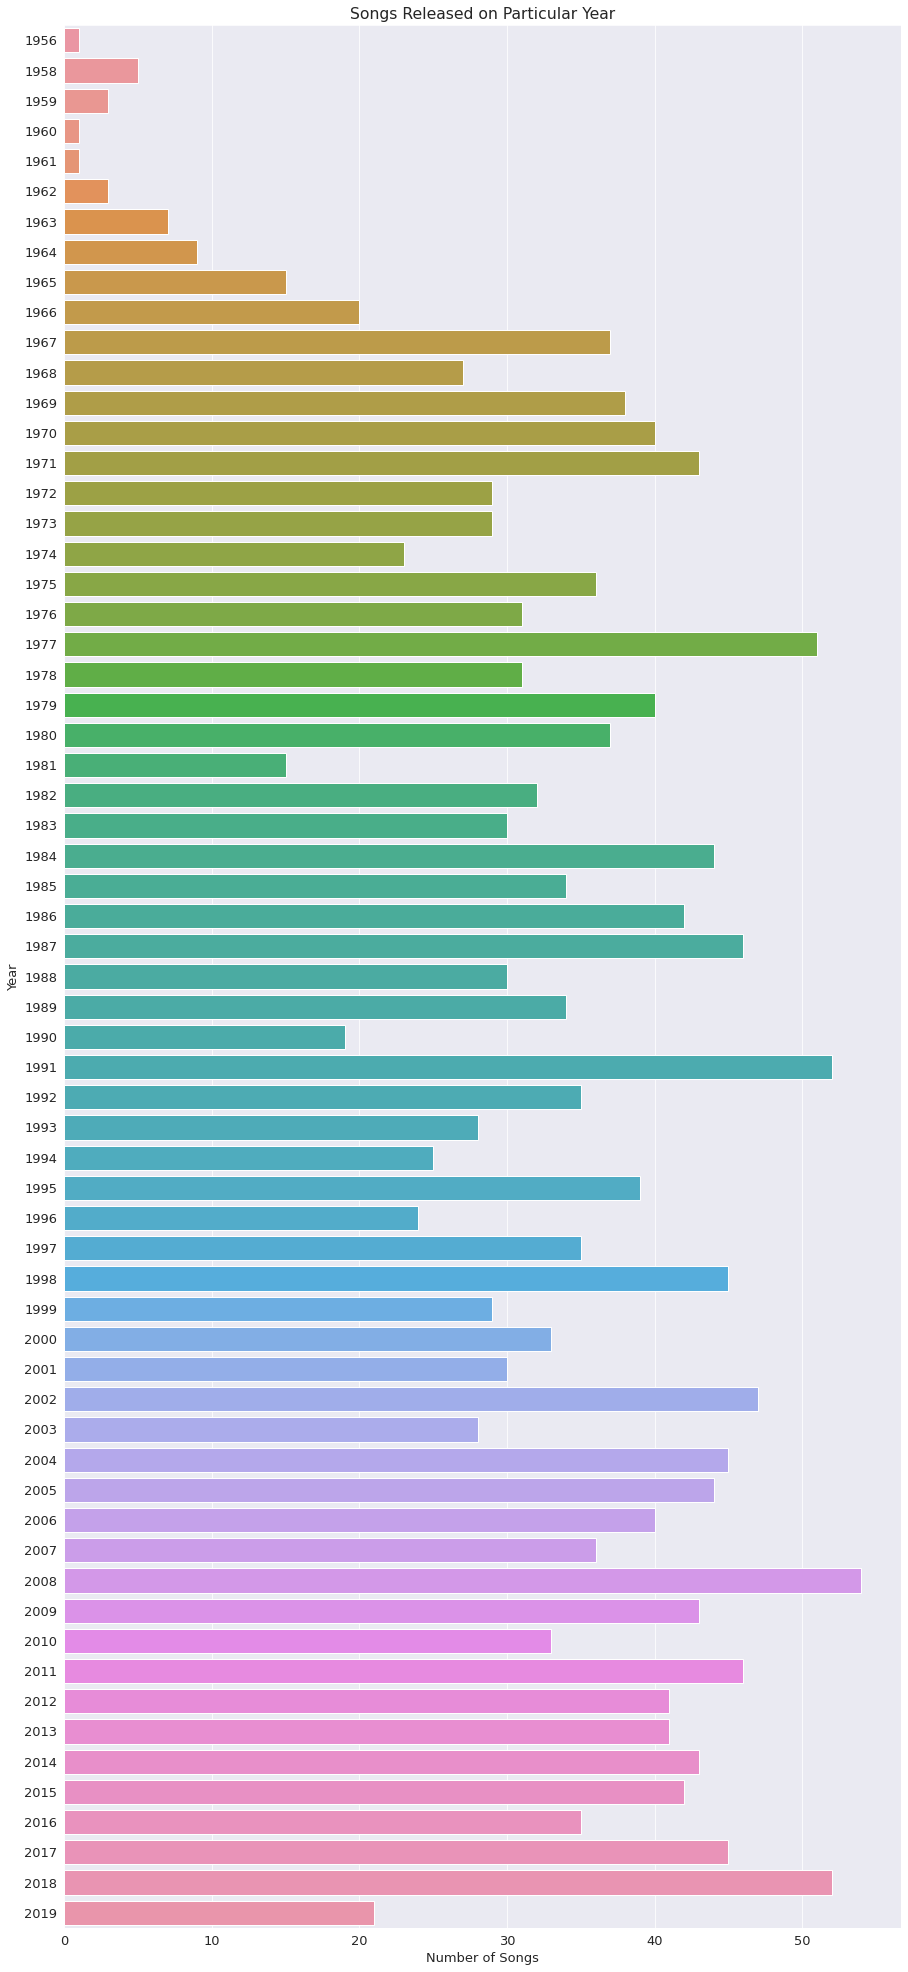

In [ ]:
plt.figure(figsize=(15,35))

songs_year_graph = sns.countplot(y=songs_df["Year"])

plt.xlabel("Number of Songs")
plt.title("Songs Released on Particular Year");

From the above graph we can tell that the most number of songs released in a particular year in the given dataset is 2008.

Let's see the average Energy in the songs released in particular year.

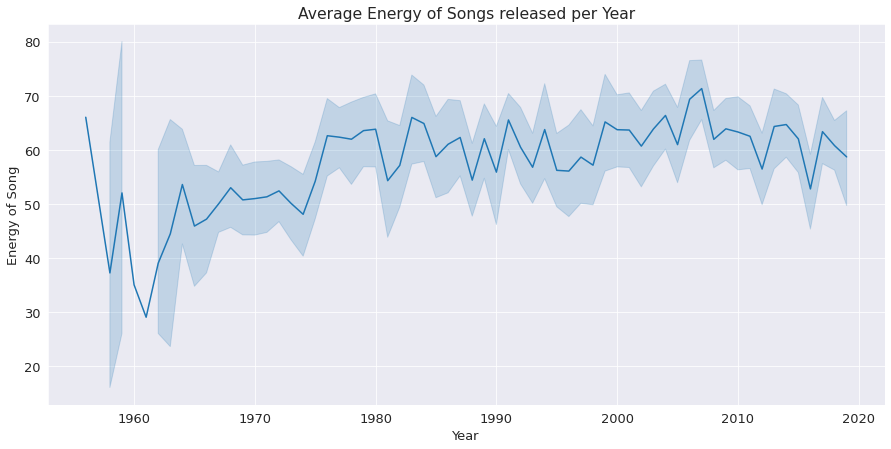

In [ ]:
plt.figure(figsize=(15,7))

songs_energy_graph = sns.lineplot(x=songs_df["Year"],
                                  y=songs_df["Energy"]);
plt.ylabel("Energy of Song");
plt.title("Average Energy of Songs released per Year");

 As the years have passed by there has been great evolution in the song industry and we can tell the energy of songs have increased gradually i from the above graph.

Let's observe the average loudness of the songs released in particular year.

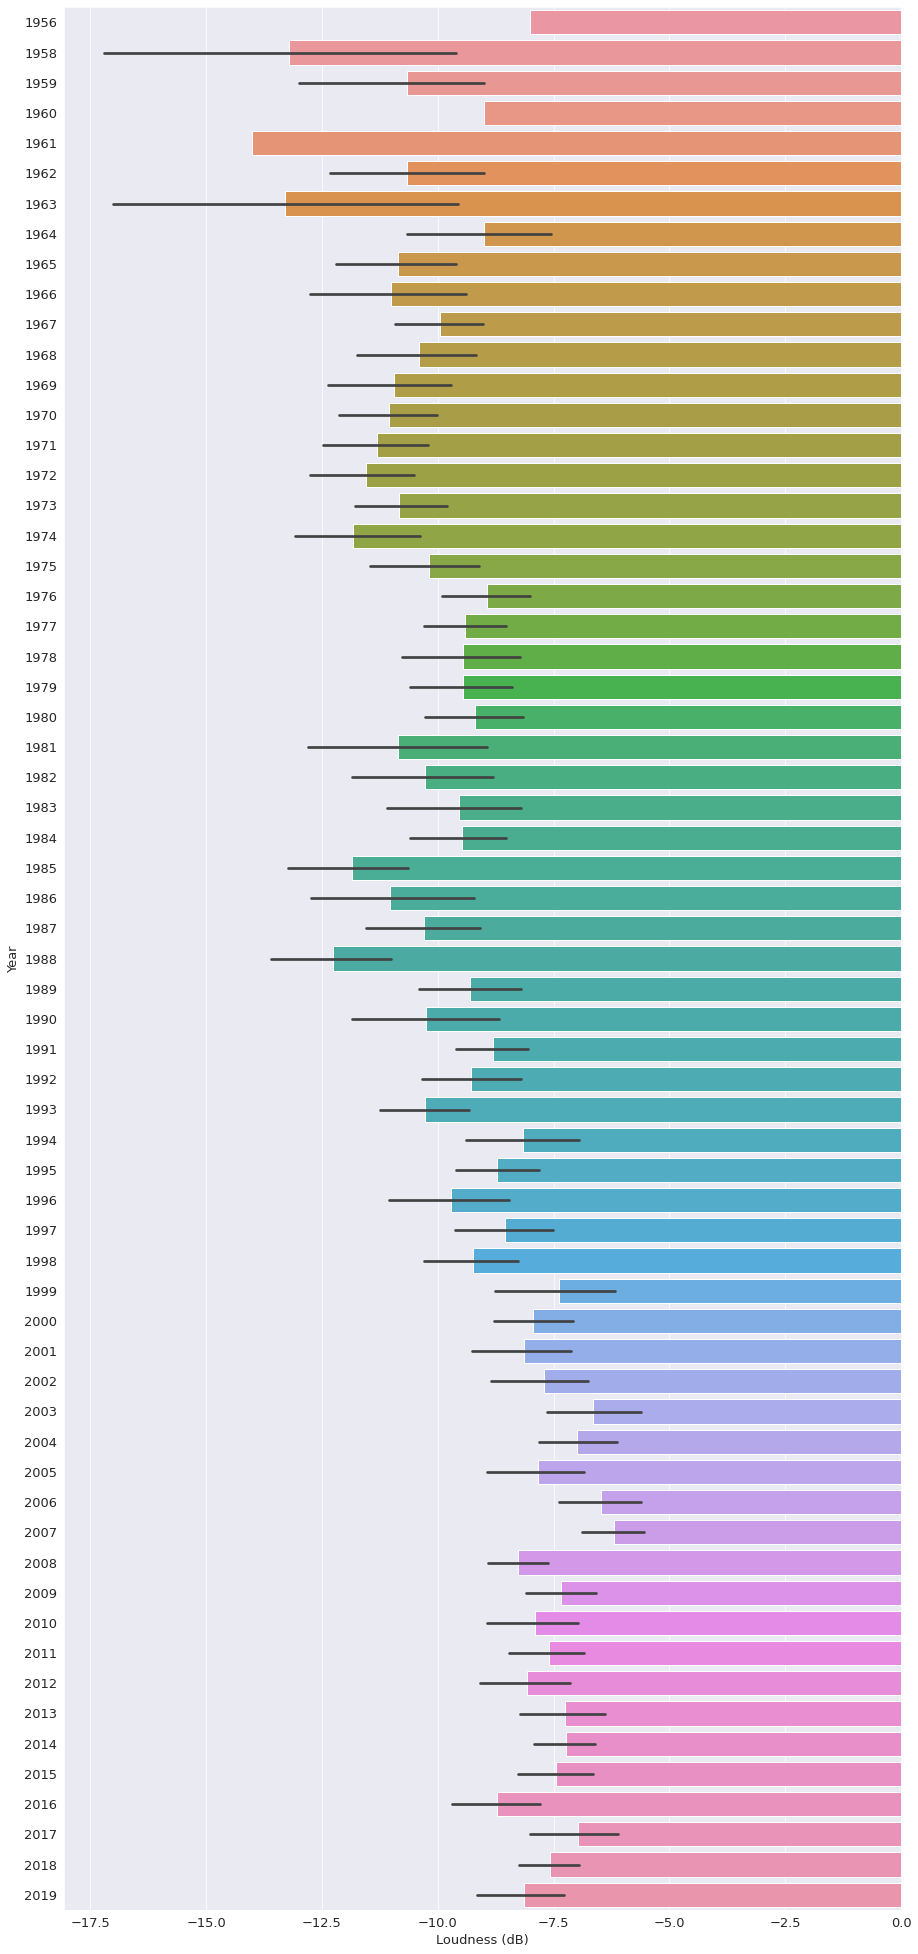

In [ ]:
plt.figure(figsize=(15,35))

songs_loudness_graph = sns.barplot(x=songs_df["Loudness (dB)"],
                                   y=songs_df["Year"],
                                   orient="h");

From the above chart we can easily tell that in the present time the people likes to hear to relaxing and sober music rather than heavy hip hop songs as compared to 1960's.

Let's see the average Popularity of songs per year.

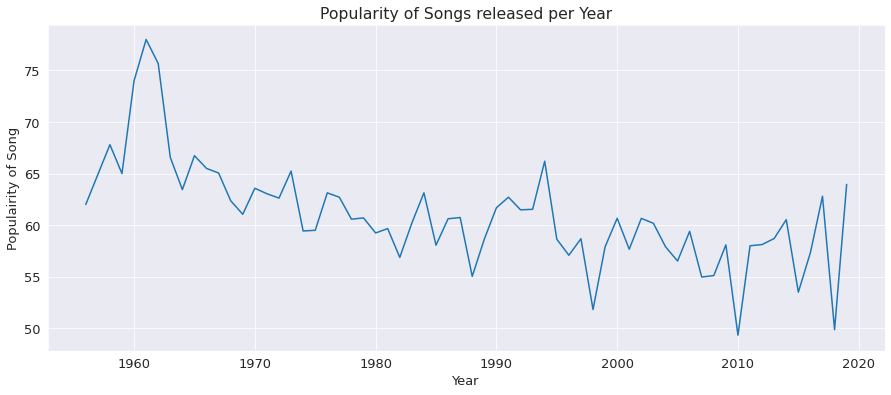

In [ ]:
plt.figure(figsize=(15,6))

songs_popularity_graph = sns.lineplot(x=songs_df["Year"],
                                  y=songs_df["Popularity"],
                                  err_style="bars",
                                  ci=0);

plt.ylabel("Populairity of Song");
plt.title("Popularity of Songs released per Year");

As we can see that the craze of music amongst the people has been degrading from past few years.

Let's see Popularity and Loudness of the songs in particular year.

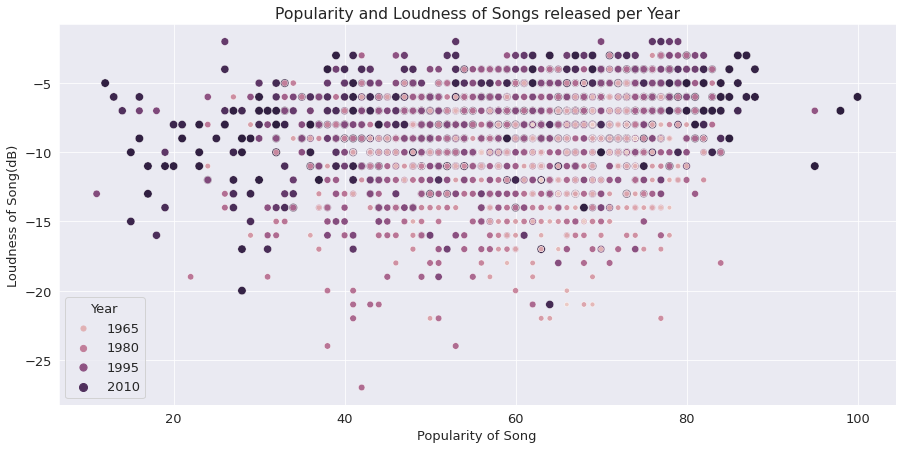

In [ ]:
plt.figure(figsize=(15,7))

songs_loudness_graph = sns.scatterplot(x=songs_df["Popularity"],
                                       y=songs_df["Loudness (dB)"],
                                       hue=songs_df["Year"],
                                       size=songs_df["Year"]);

plt.ylabel("Loudness of Song(dB)");
plt.xlabel("Popularity of Song");
plt.title("Popularity and Loudness of Songs released per Year");

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kartik13negi/zerotopandas-course-project-songs" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kartik13negi/zerotopandas-course-project-songs


'https://jovian.com/kartik13negi/zerotopandas-course-project-songs'

## Asking and Answering Questions





#### Q1: Which are the most popular songs on Spotify of all time?

In [ ]:
popular_songs = songs_df.sort_values("Popularity",ascending = False).head(100)

In [ ]:
popular_songs

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
793,Dance Monkey,Tones and I,australian pop,2019,98,59,82,-6,15,51,209,69,9,100
787,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,98
786,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,95
1641,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150,63,34,-7,7,35,241,16,4,95
688,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,With Or Without You - Remastered,U2,irish rock,1987,110,43,54,-12,14,11,296,0,3,80
422,Just the Way You Are,Bruno Mars,dance pop,2010,109,84,64,-5,9,43,221,2,4,80
749,You Say,Lauren Daigle,ccm,2018,148,63,49,-7,9,8,275,68,3,80
270,Snow (Hey Oh),Red Hot Chili Peppers,alternative rock,2006,105,90,43,-4,12,60,335,12,5,80


We can see that the most popular song is Dance monkey by Tones and l released in 2019.We can see that there are many other popular songs in the list.

Now , It would be a great idea to plot these songs with respect to their normalized Popularity for getting better insights.

Here's the graphical representation for top 20 most popular songs on Spotify.

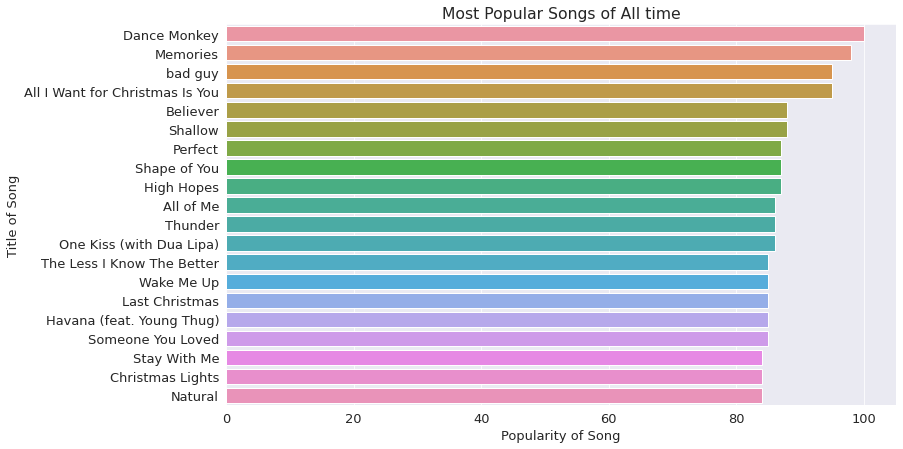

In [ ]:
plt.figure(figsize=(12,7))

popular_songs_graph = sns.barplot(x=popular_songs.Popularity,
                                  y=popular_songs.Title);

plt.xlabel("Popularity of Song");
plt.ylabel("Title of Song");
plt.title("Most Popular Songs of All time");

#### Q2: What is the relation between Danceability and Energy of Song?

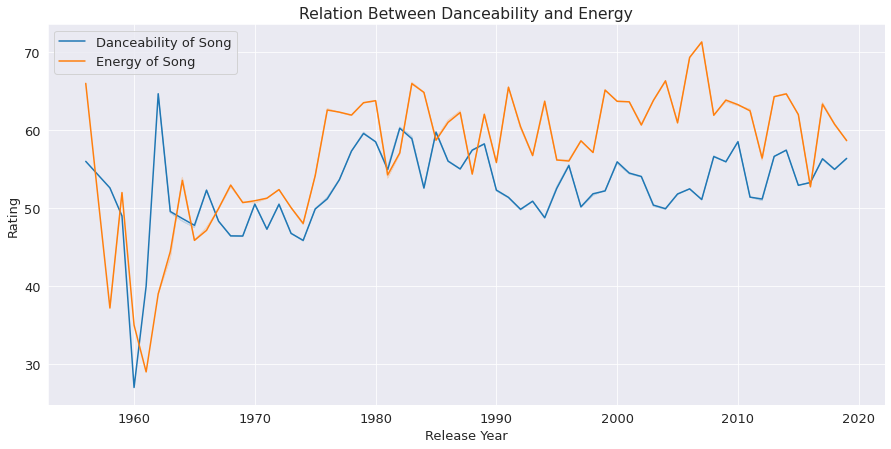

In [ ]:
plt.figure(figsize=(15,7))

sns.lineplot(x=songs_df["Year"],
             y=songs_df["Danceability"],
             ci=0);
sns.lineplot(x=songs_df["Year"],
             y=songs_df["Energy"],
             ci=0);

plt.legend(["Danceability of Song","Energy of Song"]);
plt.xlabel("Release Year");
plt.ylabel("Rating");
plt.title("Relation Between Danceability and Energy");

We can easily that the nowadays the songs are made so energetic that anyone can dance to these songs.

#### Q3: What are the Top 10 Genres of all time on Spotify?

In [ ]:
top_genres_df=songs_df.groupby(["Top Genre"],as_index=False)["Title"].count().sort_values('Title',ascending=False).head(10)
top_genres_df

,Top Genre,Title
5,album rock,413
2,adult standards,123
84,dutch pop,88
12,alternative rock,86
71,dance pop,83
82,dutch indie,75
9,alternative metal,70
72,dance rock,52
80,dutch cabaret,51
61,classic rock,51


The above table tells the most favorite genres on spotify.But it will better if we can see this data on a bar chart for better visualization and insights.

So,below is the graph for the above data.

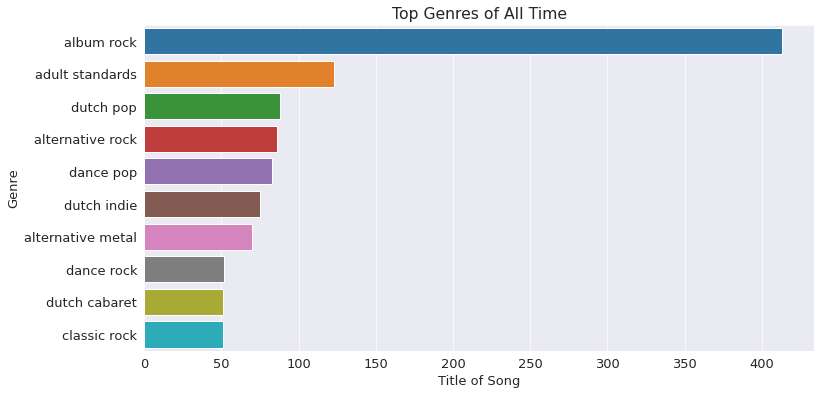

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(x=top_genres_df["Title"],
            y=top_genres_df["Top Genre"]);

plt.xlabel("Title of Song");
plt.ylabel("Genre");
plt.title("Top Genres of All Time");

#### Q4: What songs were Released by Artists after 2000s?

In [ ]:
top_popular_df=songs_2000s_df.groupby(["Artist","Year"],as_index=False)[["Title"]].count().sort_values('Title',ascending=False).head(40)

In [ ]:
heatmap_df=top_popular_df.pivot("Artist","Year","Title").fillna(0)
heatmap_df

Year,2000,2001,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Artist,,,,,,,,,,,,,,,,,,
Adele,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Amy Winehouse,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andre Hazes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Anouk,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Avicii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
BLØF,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Beyoncé,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boudewijn de Groot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Coldplay,0.0,0.0,7.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


Many songs were released after 2000s by multiple artists.But it is difficult to tell that what are the total number of songs released by a particular artist.

So it would better to plot this data using some graph or map.

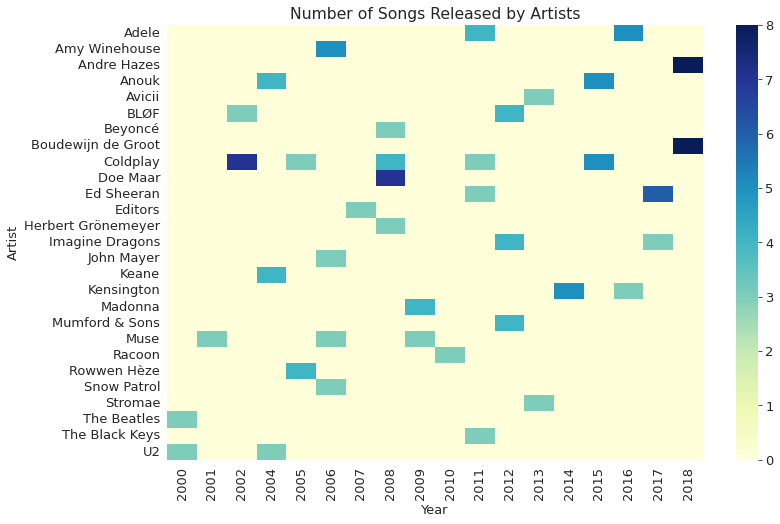

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(heatmap_df,
            cmap="YlGnBu");

plt.title("Number of Songs Released by Artists");

Now we can easily tell that Coldplay has the most number of songs after 2000.

#### Q5: What is the average length (Duration) of the songs?

<Figure size 1440x720 with 0 Axes>

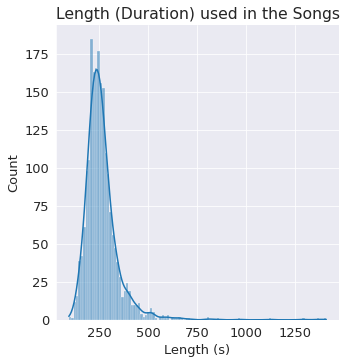

In [ ]:
plt.figure(figsize=(20,10))

sns.displot(x=songs_df["Length (Duration)"],
            kde=True);

plt.xlabel("Length (s)")
plt.title("Length (Duration) used in the Songs");

From the above histogram we can tell that the average duration of songs is around 165 seconds.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kartik13negi/zerotopandas-course-project-songs" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/kartik13negi/zerotopandas-course-project-songs


'https://jovian.com/kartik13negi/zerotopandas-course-project-songs'

## Inferences and Conclusion

From the analysis we discovered these:
- Relation Between Energy and Danceability of Songs
- Most songs released by artist in 2000s
- Average Length of Songs
- Top Genres of All Time

After conducting exploratory data analysis on Most played songs of all time dataset, several key insights can be drawn. The trend between 1956 and 2019 can be studied to predict songs and artists. Important questions were asked and can be used to infer new questions and subsequently, their answers.Pandas, Matplotlib, and Seaborn was used for providing valuable insights and visualizations of the data. Pandas was used to clean and manipulate the data, Matplotlib,seaborn was used to create data visualizations.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

- **Dataset** - https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset
- https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
- https://sparkbyexamples.com/pandas/pandas-get-cell-value-from-dataframe/#:~:text=In%20Pandas%2C%20DataFrame.loc%5B%5D,Duration%20column%20(3rd%20column).&text=Copy-,Yields%20below%20output.,'%5D%20returns%20a%20pandas%20Series.
- https://www.geeksforgeeks.org/python-pandas-series-tolist/
- https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/
- https://www.statology.org/seaborn-pie-chart/#:~:text=Seaborn%20Color%20Palette-,The%20following%20code%20shows%20how%20to%20create%20a%20pie%20chart,palette%20to%20use%20colors%20%3D%20sns.
- https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
- https://www.geeksforgeeks.org/how-to-add-a-title-to-seaborn-plots/


### Future work
- EDA on Songs available on different platforms over the internet
- Songs catalog and rating System using python
- We can actually find many relation between other data provided in Dataset and discover new trends.


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>